1a. u=0.5
    Since all are fair coins, c1, crandom, cmin have all probability of 0.5
    
1b. Histograms: See below histogram. 
Was able to plot in Matlab using: binornd(10, 0.5, 1, 1000) unable to copy into jupyter notebook.
v1 and vrandom have a binomial distribution. vmin does not have a binomial distribution.

1c. See graph below
Hoeffding inequality cannot be applied to cmin.
P[(vmin-umin)>epsilon]<=2e^(-2epsilon^2N) ~ 0.08 which is different from Pvmin ~0.6

1d. c1 and crandom correspond to Hoeffdings inequality.


In [1]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt 
np.random.seed(42)


In [2]:
n = 10
p = 0.5
np.random.binomial(n,p)


4

In [3]:
np.random.seed(42)
n=10
p=0.5
# let us repeat our experiment for 100 times
size=1000
x=np.random.binomial(n, p, size)
x

array([ 4,  8,  6,  5,  3,  3,  3,  7,  5,  6,  2,  8,  7,  4,  4,  4,  4,
        5,  5,  4,  5,  3,  4,  4,  5,  6,  4,  5,  5,  2,  5,  3,  3,  8,
        8,  6,  4,  3,  6,  5,  3,  5,  2,  7,  4,  6,  4,  5,  5,  4,  8,
        6,  7,  7,  5,  7,  3,  4,  2,  4,  5,  4,  7,  4,  4,  5,  3,  6,
        3,  8,  6,  4,  1,  6,  6,  6,  6,  3,  4,  3,  7,  6,  4,  3,  4,
        4,  6,  6,  7,  5,  3,  6,  6,  5,  6,  5,  5,  5,  2,  3,  2,  6,
        4,  5,  7,  4,  5,  6,  4,  3,  4,  3,  7,  6,  6,  7,  6,  4,  7,
        5,  6,  7,  4,  3,  4,  5,  6,  7,  1,  5,  5,  4,  3,  4,  7,  4,
        5,  6,  4,  8,  8,  4,  5,  4,  4,  2,  5,  5,  2,  4,  7,  4,  3,
        5,  8,  4,  6,  6,  4,  6,  4,  6,  6,  5,  3,  7,  4,  4,  2,  5,
        6,  2,  5,  4,  6,  4,  6,  5,  7,  3,  4,  3,  7,  7,  4,  6,  6,
        5,  5,  4,  3,  7,  7,  6,  4,  4,  6,  7,  7,  6,  6,  3,  3,  7,
        5,  1,  3,  6,  1,  3,  5,  6,  6,  4,  6,  4,  4,  6,  6,  7,  6,
        5,  3,  4,  4,  4

In [4]:
[np.equal(x,i).sum() for i in range(n)]

[0, 5, 53, 134, 207, 238, 194, 116, 46, 6]

In [5]:
probs_1000 = [np.equal(x,i).mean() for i in range(n)]
print(probs_1000)

[0.0, 0.005, 0.053, 0.134, 0.207, 0.238, 0.194, 0.116, 0.046, 0.006]


Text(0,0.5,'Probability')

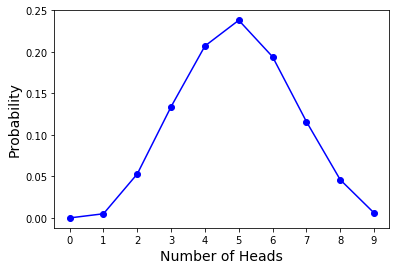

In [6]:
plt.xticks(range(n))
plt.plot(list(range(n)), probs_1000, color='blue', marker='o')
plt.xlabel('Number of Heads',fontsize=14)
plt.ylabel('Probability',fontsize=14)

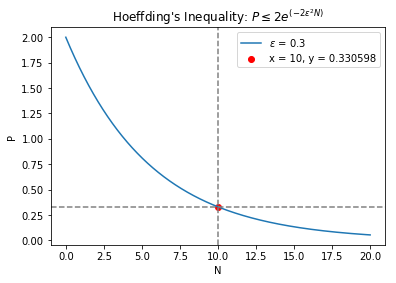

In [7]:

from scipy import signal
import numpy as np
import math

def hoeffding (x, epsilon):
    y = 2.0 * math.exp (-2*epsilon*epsilon*x)
    return y

x = np.arange (0, 20, 0.01)

y = [hoeffding (x, 0.3) for x in x]

import matplotlib.pyplot as plt

plt.xlabel ('N')
plt.ylabel ('P')
latex1 = r'P\leq2e^{\left( -2\varepsilon ^{2}N\right)}'
plt.title (r"Hoeffding's Inequality: $ %s $" % latex1)

latext2 = r'\varepsilon'
plt.plot (x, y, label='$%s$ = 0.3' % latext2)

x2 = 10
y2 = hoeffding (10, 0.3)
#plt.plot ([0, 10], [y2, y2], label='y = %f' % y2)
plt.axhline (y = y2, color='grey', linestyle='--')
plt.axvline (x = x2, color='grey', linestyle='--')
plt.scatter (x2, y2, color='red', label='x = %d, y = %f' % (x2, y2))

plt.legend ()
plt.show ()